In [1]:
!ls ../data/

car_test.csv	      driver_info.csv	    rides_info.csv
car_train.csv	      fix_info.csv	    test_data.csv
demo_car_train.csv    fs_task1_10f.csv	    tmp_car_info.csv
demo_driver_info.csv  fs_task2_45f.csv	    tmp_driver_info.csv
demo_fix_info.csv     fs_task3_310f.csv     tmp_rides_info.csv
demo_rides_info.csv   quickstart_train.csv


In [64]:
import pandas as pd
path = '../data/demo_rides_info.csv'
df = pd.read_csv(path)

cols = ['user_id', 'rating', 'speed_max', 'ride_cost']
df = df[cols]

df = df[df['ride_cost'] < 1_000]
df = df.sample(15)
df.to_csv('../data/stepik_rides.csv', index=False)
print(df.shape)
df.head()

(15, 4)


,user_id,rating,speed_max,ride_cost
36328,m10467701Z,4.75,70.000000,235
28953,e59744813O,7.75,90.000000,310
4619,M18904662S,4.86,67.000000,667
1331,K19764177B,0.10,64.000000,20
20272,a19305300d,3.95,77.810864,851


In [66]:
df.drop_index()#to_dict()

df_dict = {'user_id': {75: 'aleron', 36328: 'm10467701Z', 28953: 'e59744813O', 4619: 'M18904662S', 1331: 'K19764177B', 20272: 'a19305300d', 43303: 'G21657027r', 30039: 's10216740w', 44543: 'd12670357X', 15505: 'u16370018Q',
                       29402: 'a16856276x', 10988: 'S20666247z', 27547: 'd17838550e', 38140: 'A19255536d', 42905: 'y10147802a', 1284: 'Y80896914P'}, 
           'rating': {75: 6, 36328: 4.75, 28953: 7.75, 4619: 4.86, 1331: 0.1, 20272: 3.95, 43303: 5.21, 30039: 1.37, 44543: 0.1, 15505: 3.38, 29402: 4.01, 10988: 3.94, 27547: 0.48, 38140: 1.58, 42905: 2.24, 1284: 2.35}, 
           'speed_max': {75: 105, 36328: 70.0, 28953: 90.0, 4619: 67.0, 1331: 64.0, 20272: 77.81086436529206, 43303: 73.0, 30039: 95.58778572802738, 44543: 68.0, 15505: 75.0, 29402: 71.8777552054031, 10988: 69.0,
                         27547: 67.87944457747528, 38140: 93.62572719223624, 42905: 100.74015873833628, 1284: 61.0}, 
           'ride_cost': {75: 150, 36328: 235, 28953: 310, 4619: 667, 1331: 20, 20272: 851, 43303: 485, 30039: 34, 44543: 160, 15505: 138, 29402: 314, 10988: 399, 27547: 136, 38140: 364, 42905: 241, 1284: 235}}

df_ = pd.DataFrame(df_dict)
df_

,user_id,rating,speed_max,ride_cost
36328,m10467701Z,4.75,70.000000,235
28953,e59744813O,7.75,90.000000,310
4619,M18904662S,4.86,67.000000,667
1331,K19764177B,0.10,64.000000,20
20272,a19305300d,3.95,77.810864,851
43303,G21657027r,5.21,73.000000,485
30039,s10216740w,1.37,95.587786,34
44543,d12670357X,0.10,68.000000,160
15505,u16370018Q,3.38,75.000000,138
29402,a16856276x,4.01,71.877755,314


In [62]:
def func(row):
    if row['rating'] > 6 and row['speed_max'] < 120:
        return int(row['ride_cost']*0.95)
    return int(row['ride_cost']*1.05)


df['final_ride_cost'] = df.apply(func, axis=1)
# df['final_ride_cost'].hist(bins=30)


<AxesSubplot: >

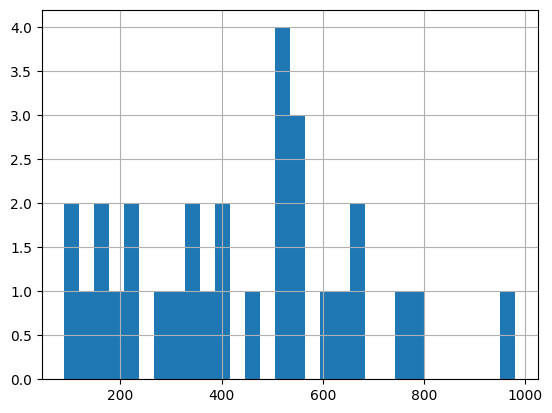

In [63]:
# df[df['final_ride_cost'] < 6_00000]
df['final_ride_cost'].hist(bins=30)